# Grade Prediction Project


### Description
Cumulative Grade Point Average (CGPA) refers to the overall Grade Point Average (GPA), obtained by dividing
the total Grade Points (GPs) earned in all courses attempted by the total degree-credit hours in all attempted courses.
 You are required to develop a machine learning system to predict final CGPA of a student at the end of fourth
year given GPs of the courses obtained in initial years (up to first, second or third year).


*  The dataset to be used is attached with this file with name The_Grades_Dataset.csv.
*  Model 1: predict final CGPA based on GPs of first year only.
* Model 2: predict final CGPA based on GPs of first two years.
* Model 3: predict final CGPA based on GPs of first three years.

Load the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# importing and Loading the Dadaset
df = pd.read_csv("F:\\Data Science\\FlipRobo\\Project 5, 6 & 7\\Grades.csv")
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


##Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [7]:
#To return number of missing values
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [8]:
df.isnull().sum().sum()

425

Data Cleaning

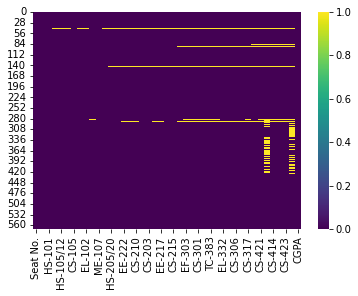

In [9]:
# Check if there is any missing value

sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [10]:
df.replace(np.nan,0, inplace = True)
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [11]:
input = df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = df[["CGPA"]]


In [12]:
target.head()

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


In [13]:
pd.unique(df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [14]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}

In [15]:
type(input)

pandas.core.frame.DataFrame

In [16]:
for item in input:
      input[item] = input[item].replace(grades_enc)

input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [17]:
# Concating inputs and targets for data insights
df = pd.concat([input, target], axis=1)


##Discover and Visualize the Data to Gain Insights:

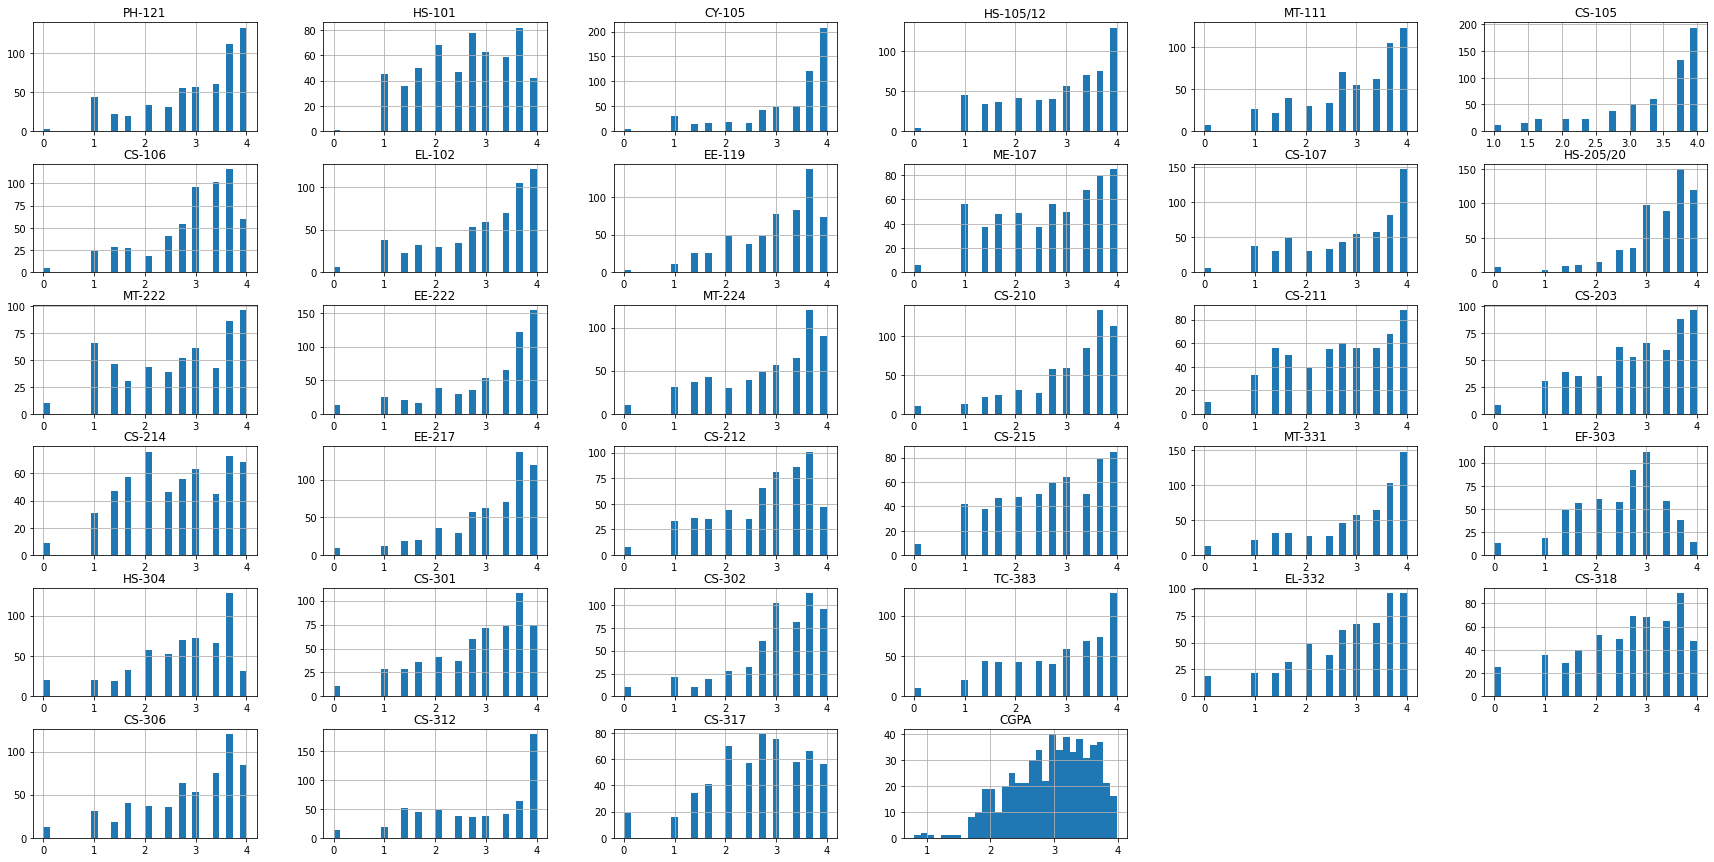

In [18]:
df.hist(bins=30,figsize=(30,15))
plt.show()

##Looking for Correlations

<AxesSubplot:>

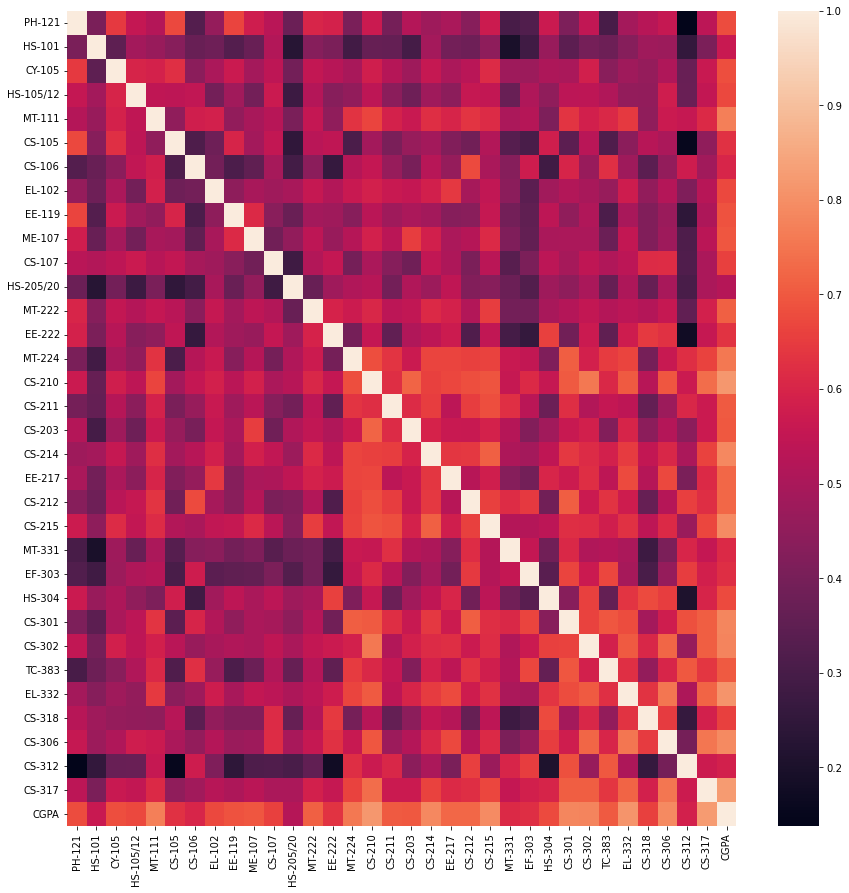

In [19]:
# Looking for correlations
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [20]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.018389,2.628371,3.262697,2.878984,2.988091,3.329247,2.961996,2.969877,3.020140,2.698599,...,2.761646,2.850788,3.050088,2.873730,2.863748,2.628371,2.892119,2.892294,2.651138,2.954888
std,0.971594,0.908402,0.932997,1.019208,0.954343,0.799826,0.869226,0.981676,0.839463,1.029323,...,0.955712,0.970483,0.877124,1.017053,1.009585,1.035205,0.989909,1.095450,0.952455,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.000000,2.000000,2.700000,2.000000,2.000000,2.000000,2.400000,2.000000,2.000000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.000000,3.000000,3.400000,3.000000,3.000000,2.700000,3.000000,3.000000,2.700000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.700000,3.700000,3.700000,3.700000,3.700000,3.400000,3.700000,4.000000,3.400000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [21]:
df.to_csv('cleaned_data.csv')

In [26]:
# Splitting file into different columns based on our model prediction requirement
model1_columns = []
model2_columns = []
model3_columns = []
for item in [input]:
 for i in item:
   if i[3]=='1':
    model1_columns.append(i)
   elif i[3]=='2':
    model2_columns.append(i)
   else:
    model3_columns.append(i)

model2_columns = model1_columns + model2_columns
model3_columns = model2_columns + model3_columns

## Prepare the data for Linear Regression:

Model 1: Predict final CGPA based on GPs of first year only.

In [27]:
# Input data
labels = df['CGPA'].values
features = df[list(model1_columns)].values


In [24]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [28]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_1 = linear_model.LinearRegression()

# Train the Model
lr_1.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict


# Predict for training set
y_train_predict = lr_1.predict(X_train)

# Predict for training set
y_test_predict = lr_1.predict(X_test)


In [30]:
input_lr=[]
input_lr.append([4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4])
print(input_lr )
print(lr_1.predict(input_lr ))

[[4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4]]
[2.02796199]


In [31]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_1.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.2296522510515818
MAE is 0.18298546550800265
---------------------------------------
The model performance for testing set
RMSE is 0.24742348254431631
MAE is 0.18741092404150425
---------------------------------------
The score of model for testing set
Test score 0.86


In [32]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,3.261,3.390226
1,3.437,3.657899
2,3.094,2.726649
3,2.254,2.219771
4,2.042,2.105713
...,...,...
167,1.905,2.023017
168,2.793,2.748698
169,3.795,3.663981
170,3.447,3.473767


In [33]:
# Visualize the Result
idx= np.random.choice(X_test.shape[0])
print ("Predicted CGPA :", y_test_predict[idx])
print ("Actual CGPA :", y_test[idx])

Predicted CGPA : 2.219770844553392
Actual CGPA : 2.254


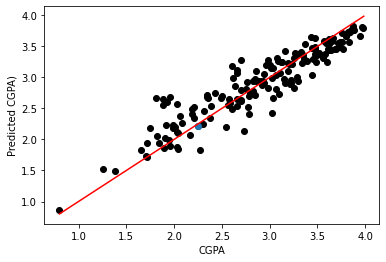

In [34]:
# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA)')
plt.plot([df["CGPA"].min(), df["CGPA"].max()], [df["CGPA"].min(), df["CGPA"].max()], color='red')
plt.show()

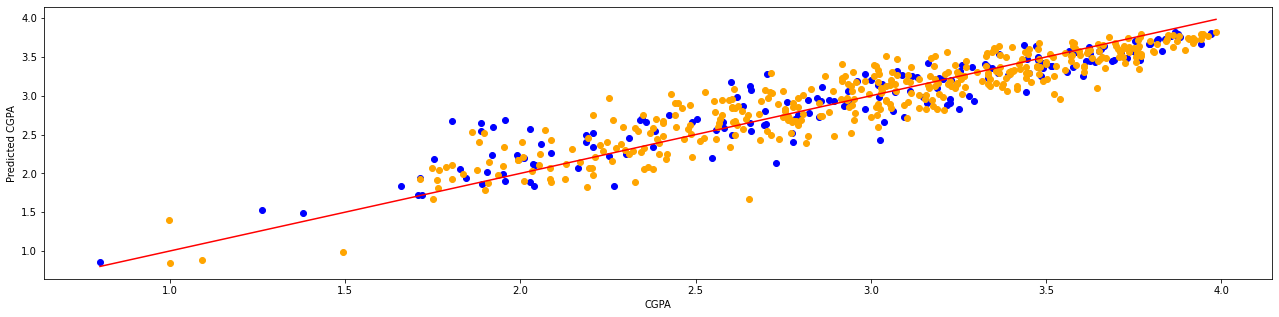

In [35]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

Model 2: Predict final CGPA based on GPs of first two years.

In [36]:
# Input data
labels = df['CGPA'].values
features = df[list(model2_columns)].values

In [37]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [38]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_2 = linear_model.LinearRegression()

# Train the Model
lr_2.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict


# Predict for training set
y_train_predict = lr_2.predict(X_train)

# Predict for training set
y_test_predict = lr_2.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_2.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.1400369886568784
MAE is 0.10392883214117514
---------------------------------------
The model performance for testing set
RMSE is 0.26982854467088174
MAE is 0.14133668108817957
---------------------------------------
The score of model for testing set
Test score 0.82


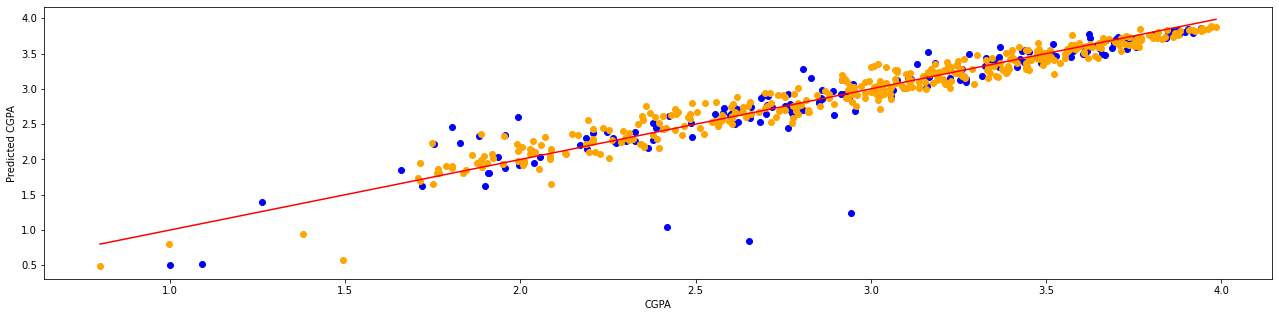

In [41]:
#Scatter plot for CGPA vs PREDICTED CGPA for Model 1
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

Model 3: Predict final CGPA based on GPs of first three years.

In [42]:
# Input data
labels = df['CGPA'].values
features = df[list(model3_columns)].values

In [43]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [44]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_3 = linear_model.LinearRegression()

# Train the Model
lr_3.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict


# Predict for training set
y_train_predict = lr_3.predict(X_train)

# Predict for training set
y_test_predict = lr_3.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_3.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.14742806341211342
MAE is 0.09117000138169644
---------------------------------------
The model performance for testing set
RMSE is 0.11699756563174148
MAE is 0.08773047964352024
---------------------------------------
The score of model for testing set
Test score 0.97


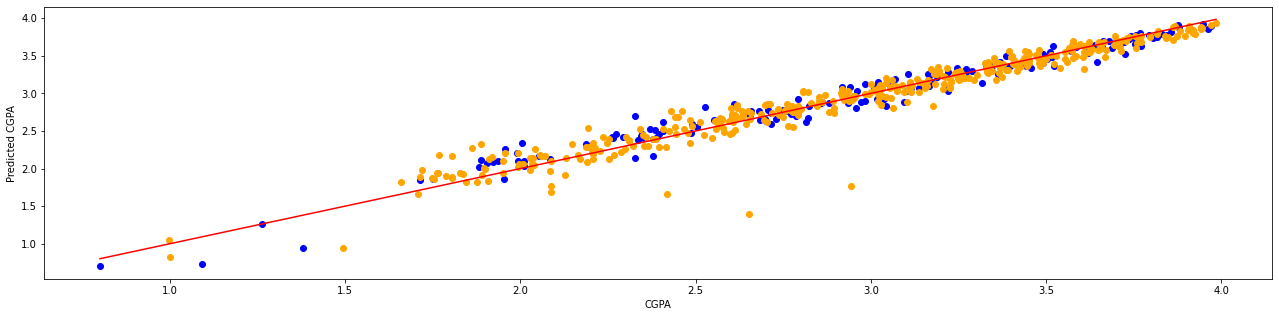

In [47]:
#Scatter plot for CGPA vs PREDICTED CGPA for Model 2
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

## Prepare the data for Random Forest:

Model 1: Predict final CGPA based on GPs of first year only.

In [48]:
# Input data
labels = df['CGPA'].values
features = df[list(model1_columns)].values

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_1 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_1.fit(X_train, y_train)
y_pred = rf_1.predict(X_test)

In [51]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_1.score(X_test, y_test))




Mean Absolute Error: 0.20248391304347832
Mean Squared Error: 0.0617916635
Root Mean Squared Error: 0.24857929016714164
The score of model for testing set 0.8223198987411774


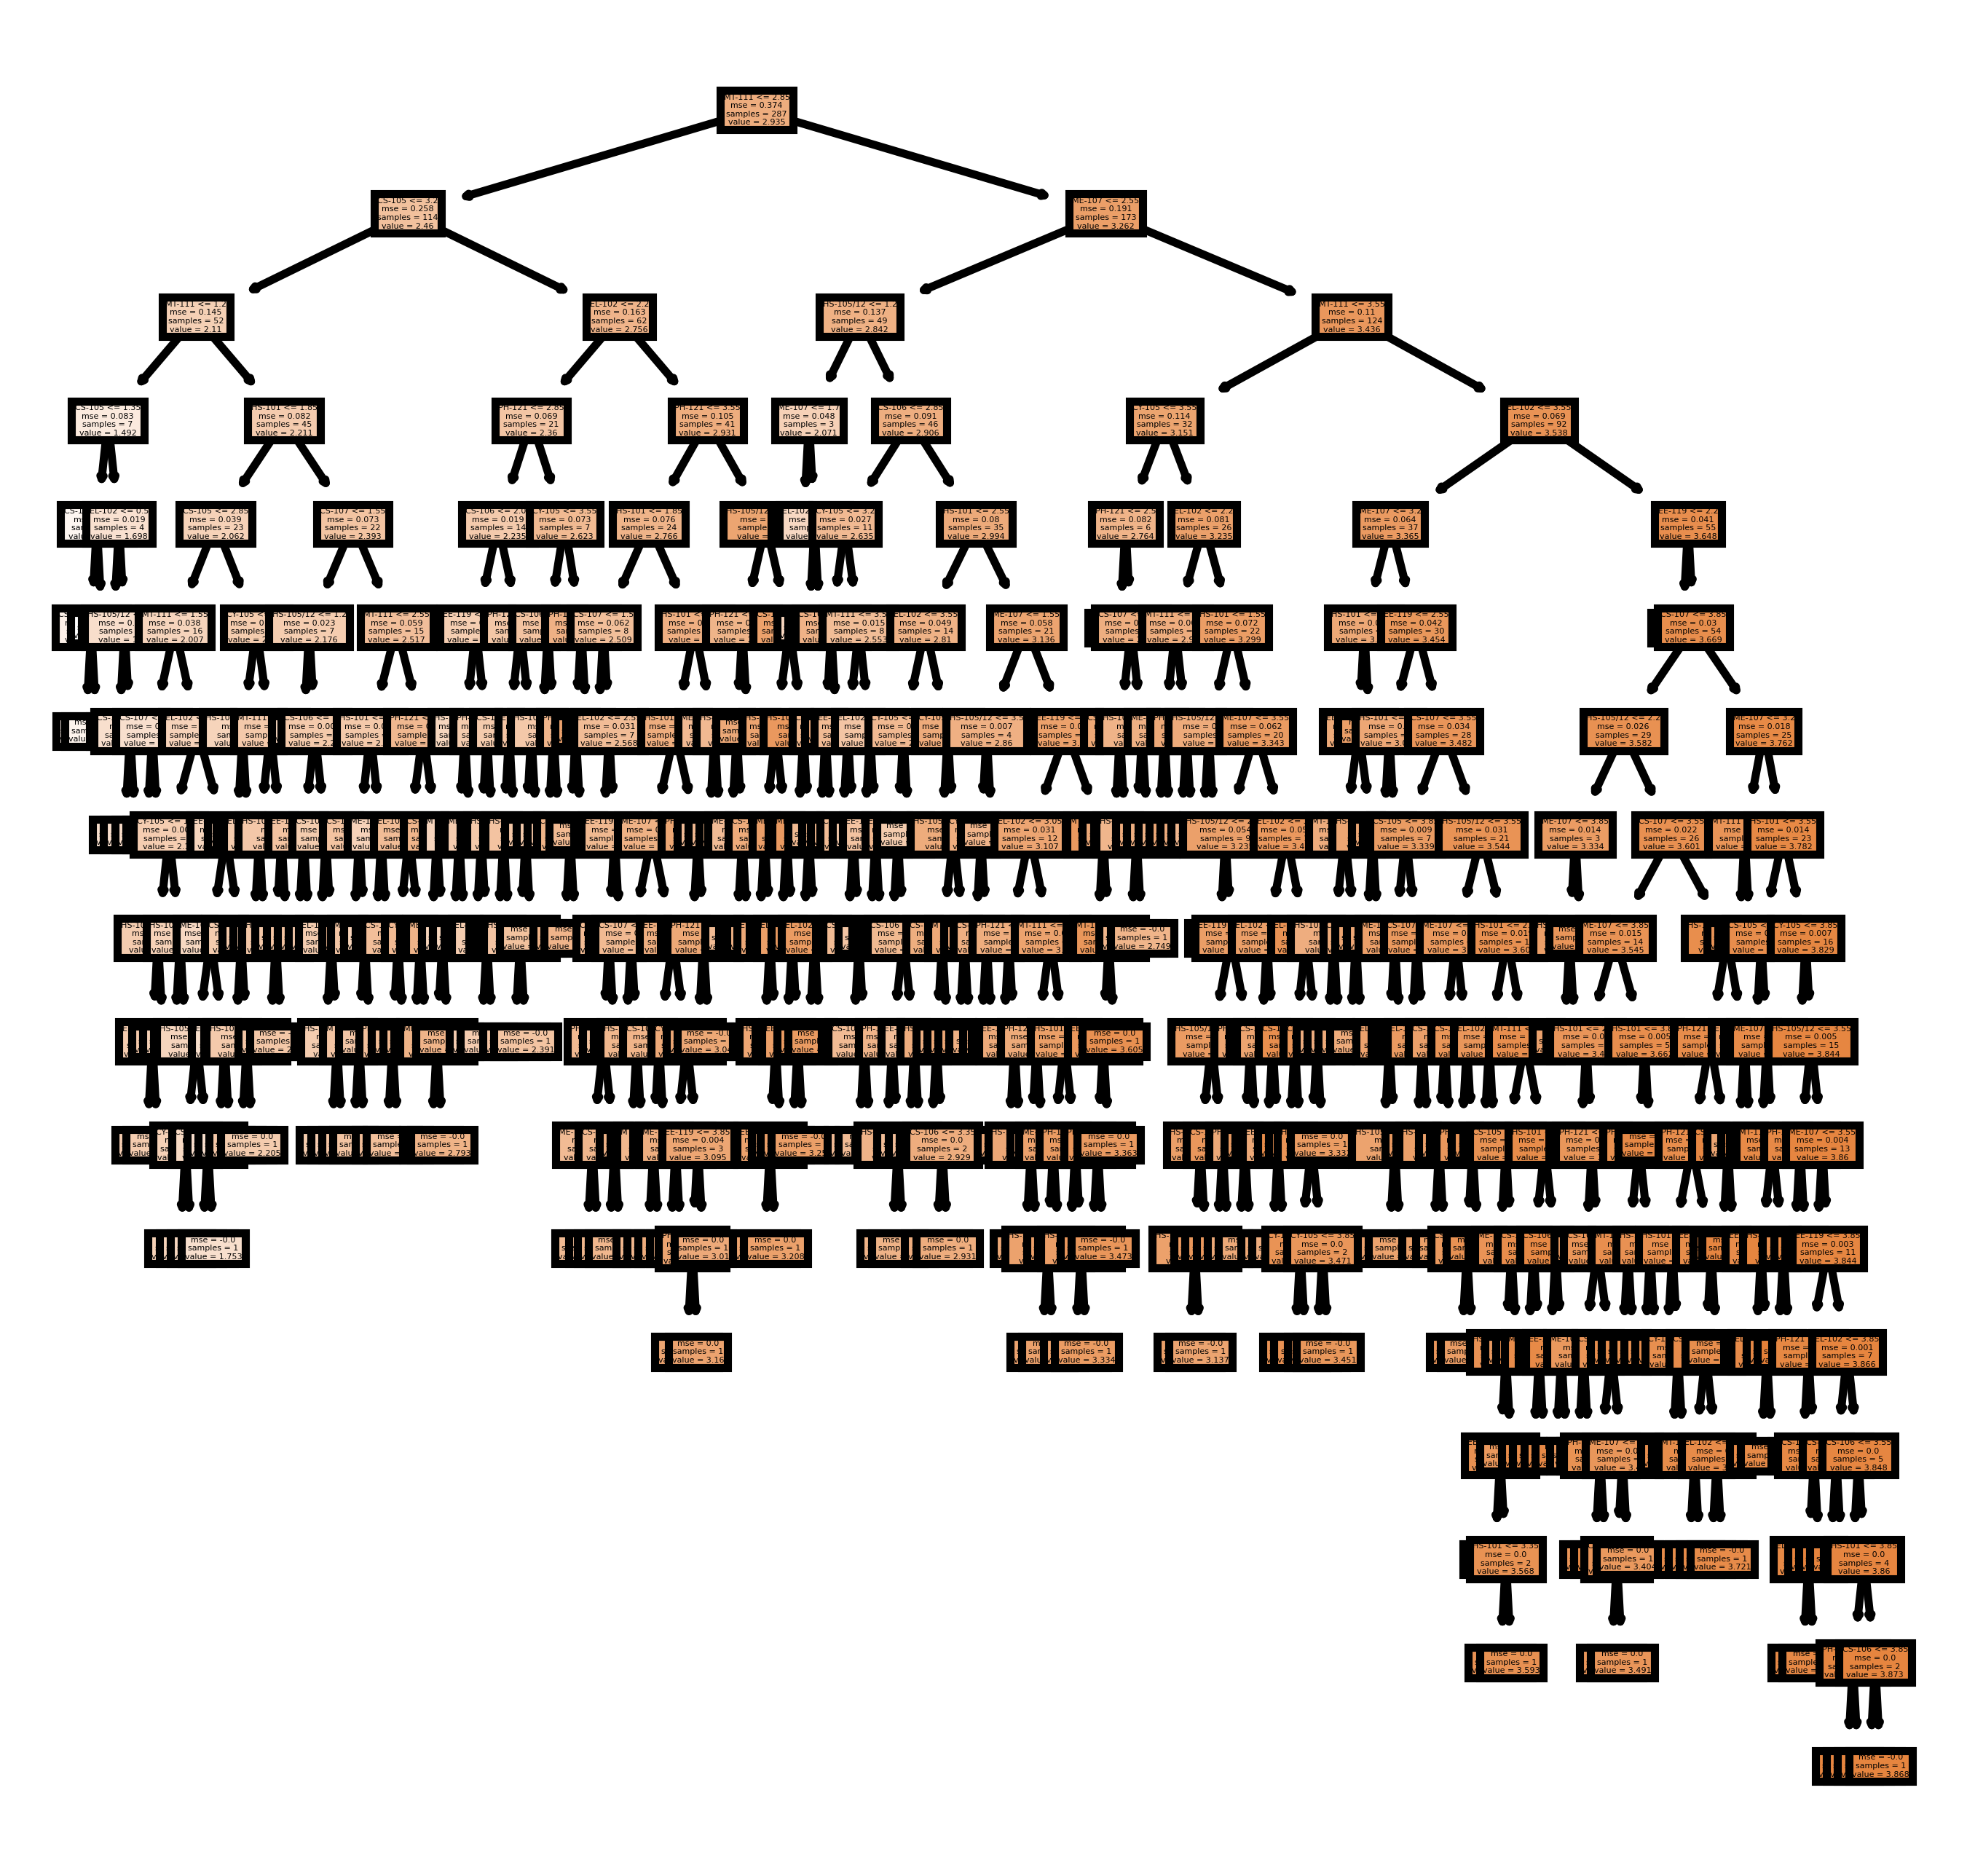

In [52]:
#Show Decision Tree for Model
from sklearn import tree
fn=model1_columns
cn="CGPA"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_1.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

Model 2: Predict final CGPA based on GPs of first two years.

In [53]:
# Input data
labels = df['CGPA'].values
features = df[list(model2_columns)].values

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_2 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_2.fit(X_train, y_train)
y_pred = rf_2.predict(X_test)

In [56]:
#Model Evaluation
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_2.score(X_test, y_test))

Mean Absolute Error: 0.1268378260869566
Mean Squared Error: 0.027115189586956558
Root Mean Squared Error: 0.16466690495347436
The score of model for testing set 0.9220310741195272


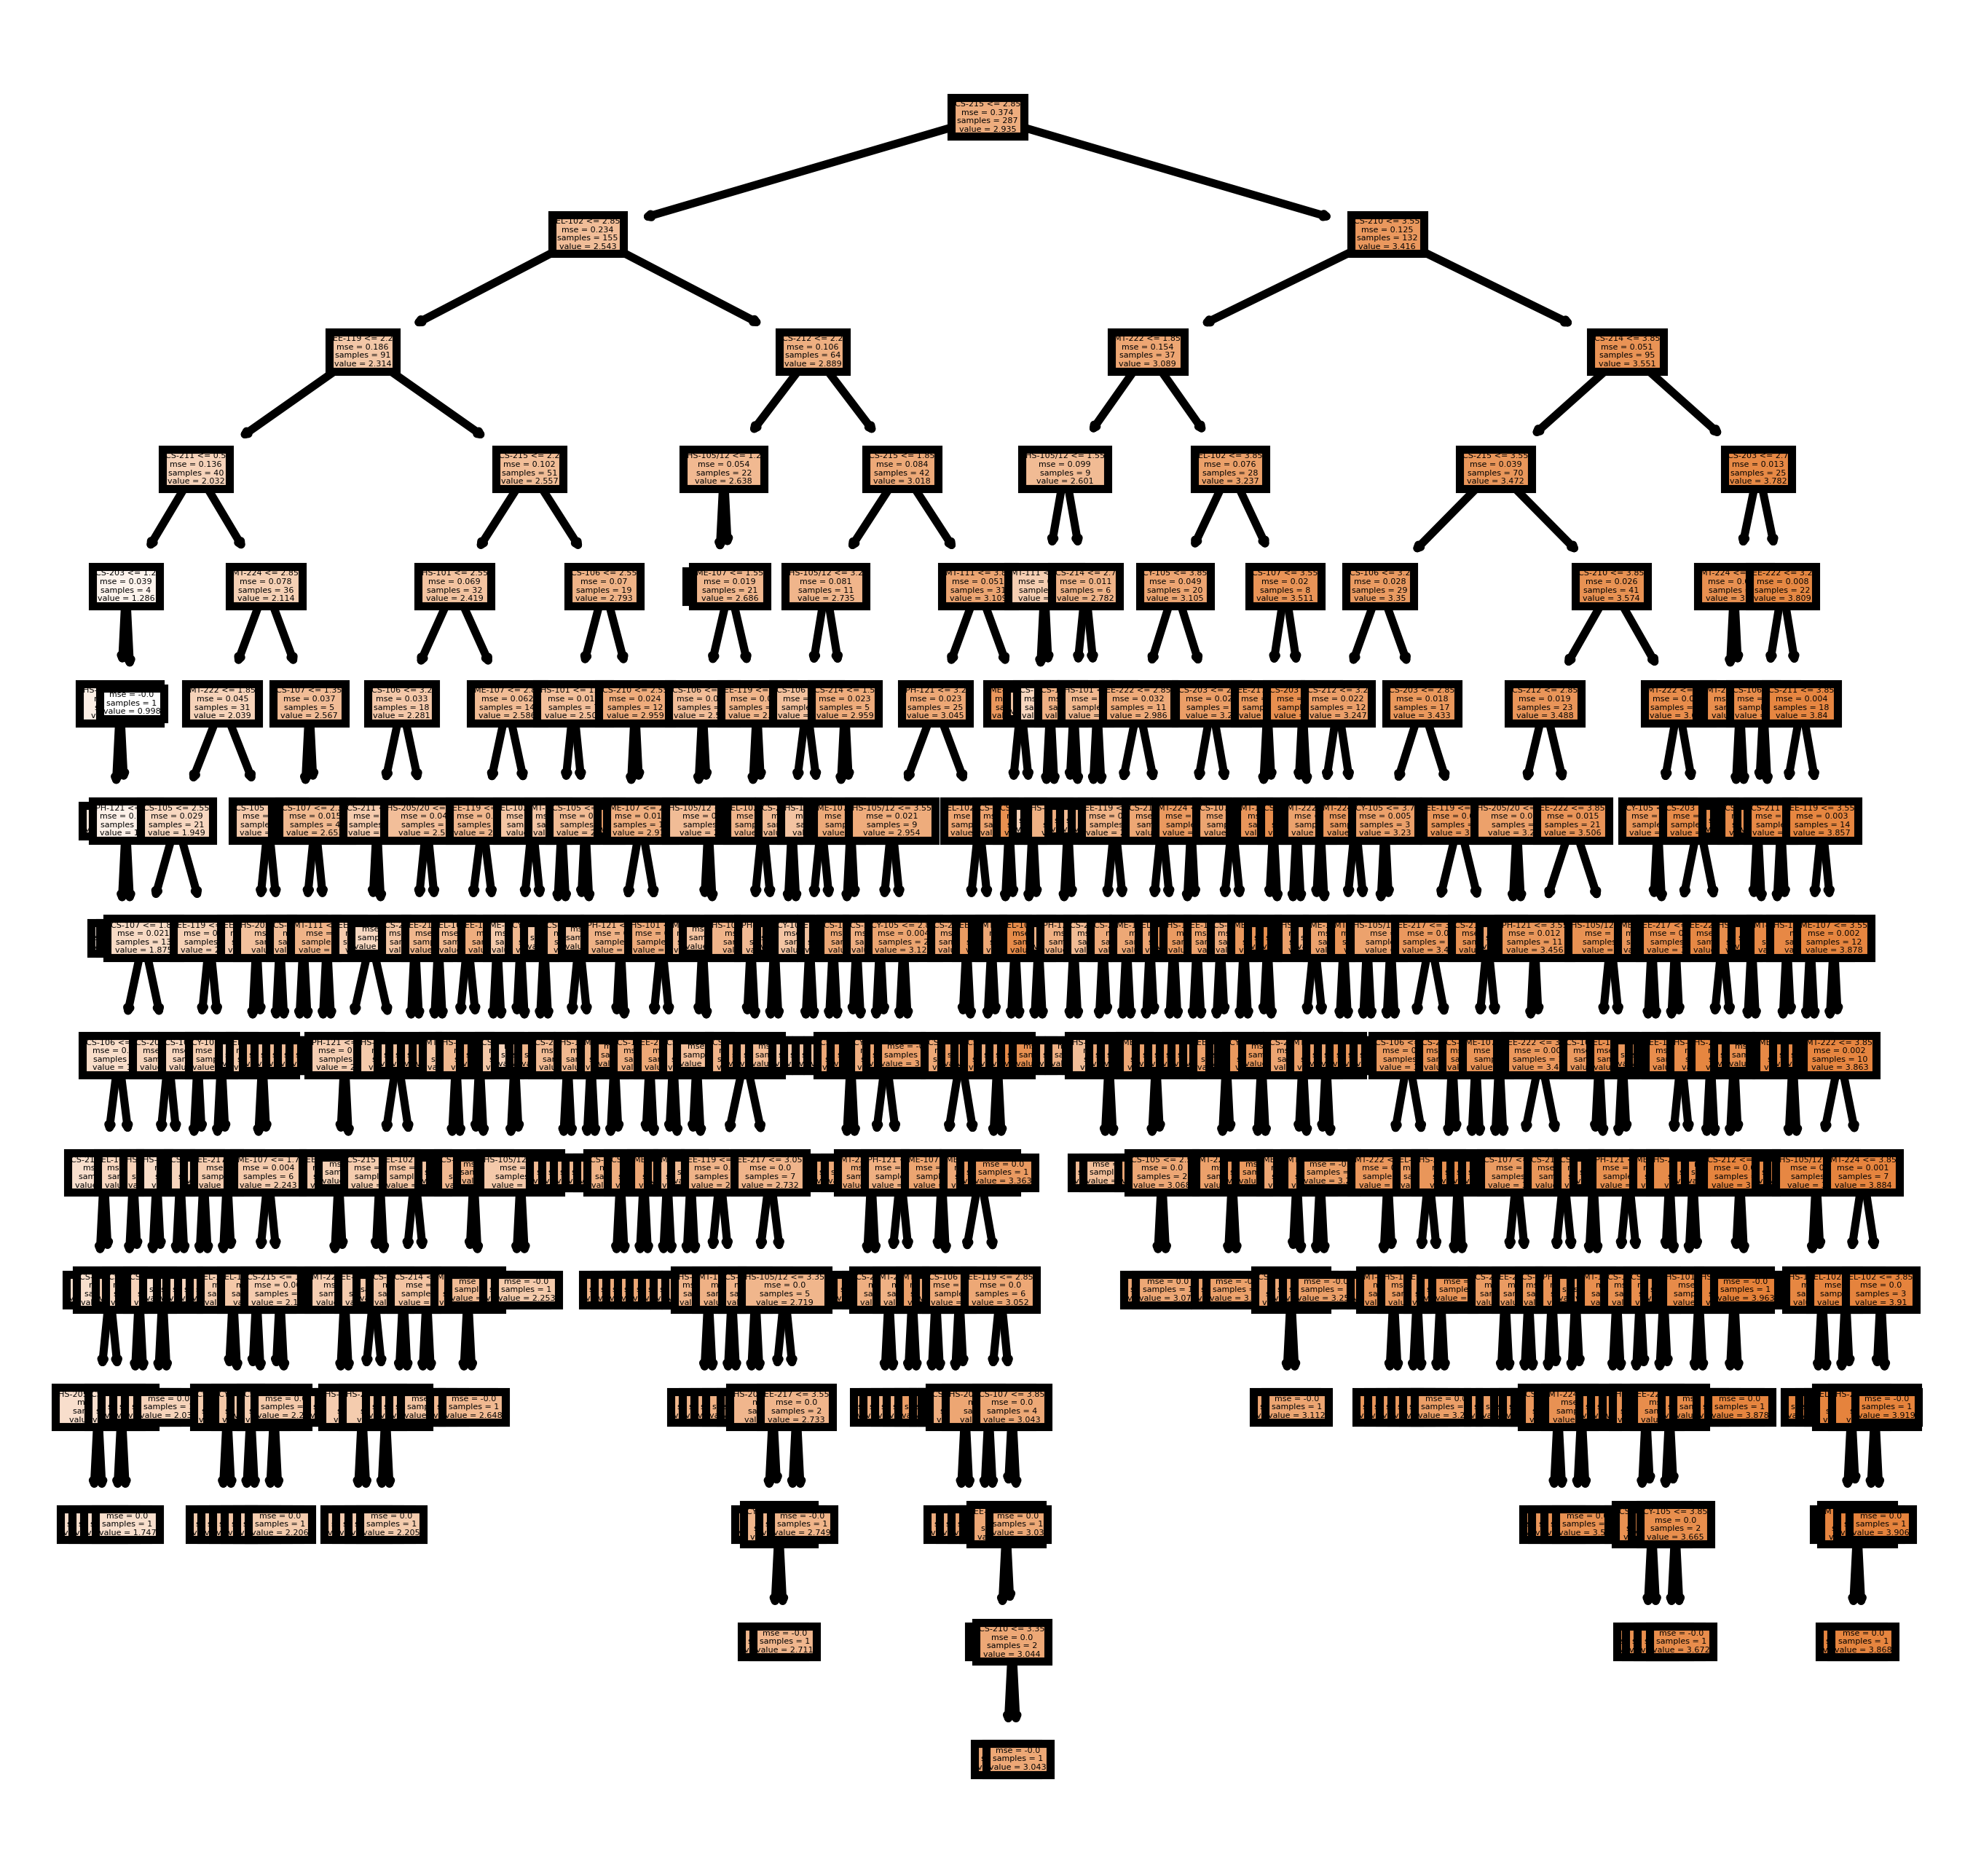

In [57]:
#Show Decision Tree Model 2
from sklearn import tree
fn=model2_columns
cn="CGPA"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_2.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_model2_individualtree.png')

Model 3: Predict final CGPA based on GPs of first three years.

In [58]:
# Input data
labels = df['CGPA'].values
features = df[list(model3_columns)].values

In [59]:
#Split Dataset into trianing and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_3 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_3.fit(X_train, y_train)
y_pred = rf_3.predict(X_test)

In [61]:
#Error measurement/Model Evaluation for Random Forest of Model3
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_3.score(X_test, y_test))

Mean Absolute Error: 0.0980052173913044
Mean Squared Error: 0.016982050608695672
Root Mean Squared Error: 0.13031519715173542
The score of model for testing set 0.9511686156218225


In [ ]:
from sklearn import tree
fn=model3_columns
cn="CGPA"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_3.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_model3_individualtree.png')

In [ ]:
del input

In [ ]:
print("-----------------------------------------------------------")
print("-------------Hello from GPA Predictor----------------------")
print("-----------------------------------------------------------")
model_1=[]
model_2=[]
model_3=[]
input_lr=[]
name = input ("Name of the Student ")
model = int(input ("From which model would you like to predict your GPA ? "))
if model == 1:
  for val in model1_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_1.append(grades_enc[GPA])
     else:
       model_1.append(0)
  input_lr.append(model_1)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is :{lr_1.predict(input_lr)}")
  print(f"{name}, your predictive CGPA according to Random Forest Algorithm is : {rf_1.predict(input_lr)}")
elif model == 2:
  for val in model2_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_2.append(grades_enc[GPA])
     else:
       model_2.append(0)

  input_lr.append(model_2)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is :{lr_2.predict(input_lr)}" )
  print(f"{name}, Your predictive CGPA according to Random Forest Algorithm is :{rf_2.predict(input_lr)}" )
elif model == 3:
  for val in model3_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_3.append(grades_enc[GPA])
     else:
       model_3.append(0)
  input_lr.append(model_3)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is : {lr_3.predict(input_lr)}")
  print(f"{name}, your predictive CGPA according to Random Forest Algorithm is : {rf_3.predict(input_lr)}" )
else:
   print("Kindly enter valid value")




